In [1]:
import pandas as pd
import numpy as np
import os
import time
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.chrome.options import Options as ChromeOptions
from selenium.webdriver.common.action_chains import ActionChains

#Google Sheets API
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# File path to chromedriver
PATH = "C:/Users/tmanett/Desktop/chromedriver.exe"

driver = webdriver.Chrome(PATH)

# Get to website
driver.get("https://www.nba2klab.com/nba2kleague-team?Raptors Uprising GC")
print(driver.title)

# Function for delay
def delay():
    time.sleep(random.randint(2,3))

C:\Users\tmanett\AppData\Local\Temp\ipykernel_24232\1722236602.py:25: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


NBA 2K League Team Stats


### Glossary

- Win%: The winning percentage
- PPG: Points Per Game
- DREB: Defensive Rebounds
- OREB: Offensive Rebounds
- REB: Rebounds
- Ast.: Assists
- TOs: Turnovers
- A/T: Assist-to-Turnover ratio
- Stls: Steals
- Blks: Blocks
- Fouls: Fouls
- FGM: Field Goals Made
- FGA: Field Goals Attempted
- FG%: Field Goal Percentage
- 2PM: Two-Point Field Goals Made
- 2PA: Two-Point Field Goals Attempted
- 2P%: Two-Point Field Goal Percentage
- TPM: Three-Point Field Goals Made
- TPA: Three-Point Field Goals Attempted
- TPP: Three-Point Field Goal Percentage
- FTA: Free Throws Attempted
- FTM: Free Throws Made
- FT%: Free Throw Percentage
- PIPAPG: Points in the Paint Average Per Game
- PIPMPG: Points in the Paint Made Per Game
- PIPPG: Points in the Paint Per Game
- EFG%: Effective Field Goal Percentage
- GS: Games Started

Click Drop Down and Select Raptors Uprising

In [2]:
team_dropdown = WebDriverWait(driver, 2).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="layout-wrapper"]/main/div[2]/div/div/div[2]/div[1]/div[1]/div[2]/div[2]/select'))).click()
delay()
raptors_uprising = WebDriverWait(driver, 2).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="layout-wrapper"]/main/div[2]/div/div/div[2]/div[1]/div[1]/div[2]/div[2]/select/option[24]'))).click()

Locate and Scrape the Team Stats Table

In [3]:
# Wait for the table to load
delay()
delay()

#Locate table element containing Team Stats
table = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="layout-wrapper"]/main/div[2]/div/div/div[2]/div[1]/div[2]/div[1]/div/div/div[2]/div/div/div/table')))

# Get the table HTML content
table_html = table.get_attribute('outerHTML')

# Use pandas to parse the HTML table
dfs = pd.read_html(table_html)

# Select the table of interest (you may need to adjust the index)
table_data = dfs[0]

table_data

,Player,PPG,DREB,OREB,REB,Ast.,TOs,A/T,Stls,Blks,...,TPA,TPP,FTA,FTM,FT%,PIPAPG,PIPMPG,PIPPG,EFG%,GS
0,BallLikeSeem,13.42,8.07,4.42,12.50,2.57,0.64,4.00,0.42,0.57,...,0.00,0.00,1.28,1.28,100.00,7.50,6.07,12.14,100.00,17.42
1,Gazulli,14.00,0.07,0.15,0.23,3.61,1.15,3.13,0.76,0.00,...,5.30,43.47,1.46,1.38,94.73,3.23,2.53,5.07,81.10,10.33
2,Haam,9.84,0.61,0.30,0.92,1.00,0.46,2.16,1.15,0.07,...,4.23,45.45,0.46,0.38,83.33,1.92,1.69,3.38,80.11,7.66
3,Mooch,16.57,0.14,0.07,0.21,9.78,2.71,3.60,0.35,0.07,...,8.78,43.08,0.78,0.78,100.00,1.92,1.21,2.42,75.42,14.21
4,Putback,7.14,2.92,1.07,4.00,0.92,0.64,1.44,1.28,0.64,...,3.35,48.93,0.07,0.07,100.00,1.35,1.00,2.00,83.33,6.87


Navigating to League Data Page

In [4]:
delay()
delay()

league_page = WebDriverWait(driver, 2).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="side-menu"]/li[7]/a'))).click()

delay()

league_data = WebDriverWait(driver, 2).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="side-menu"]/li[7]/ul/li[1]/a'))).click()


Locate and Scrape the League Player Stats Table

In [5]:
# Wait for the table to load
delay()
delay()
delay()
delay()

all_data = pd.DataFrame()

#Locate table element containing League Player Stats
table0 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="layout-wrapper"]/main/div[2]/div/div/div[2]/div[2]/div/div/div/div/div[1]/div[2]/div/div/div/table')))

# Get the table HTML content
table_html0 = table0.get_attribute('outerHTML')

# Use pandas to parse the HTML table
dfs0 = pd.read_html(table_html0)

# Select the table of interest (you may need to adjust the index)
table_data0 = dfs0[0]

# Append the table data to the main dataframe
all_data = pd.concat([all_data, table_data0], ignore_index=True)

delay()

# Locate the button element
button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, '/html/body/div/div/main/div[2]/div/div/div[2]/div[2]/div/div/div/div/div[1]/div[3]/div/div[2]/ul/li[3]/a')))

# Scroll to the button's location using JavaScript
driver.execute_script("arguments[0].scrollIntoView();", button)

# Click the button using JavaScript
driver.execute_script("arguments[0].click();", button)

delay()

#Locate table element containing League Player Stats
table1 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="layout-wrapper"]/main/div[2]/div/div/div[2]/div[2]/div/div/div/div/div[1]/div[2]/div/div/div/table')))

# Get the table HTML content
table_html1 = table1.get_attribute('outerHTML')

# Use pandas to parse the HTML table
dfs1 = pd.read_html(table_html1)

# Select the table of interest (you may need to adjust the index)
table_data1 = dfs1[0]

# Append the table data to the main dataframe
all_data = pd.concat([all_data, table_data1], ignore_index=True)

# Click the button using JavaScript
driver.execute_script("arguments[0].click();", button)

delay()

#Locate table element containing League Player Stats
table2 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="layout-wrapper"]/main/div[2]/div/div/div[2]/div[2]/div/div/div/div/div[1]/div[2]/div/div/div/table')))

# Get the table HTML content
table_html2 = table2.get_attribute('outerHTML')

# Use pandas to parse the HTML table
dfs2 = pd.read_html(table_html2)

# Select the table of interest (you may need to adjust the index)
table_data2 = dfs2[0]

# Append the table data to the main dataframe
all_data = pd.concat([all_data, table_data2], ignore_index=True)

driver.execute_script("arguments[0].click();", button)

delay()

#Locate table element containing League Player Stats
table3 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="layout-wrapper"]/main/div[2]/div/div/div[2]/div[2]/div/div/div/div/div[1]/div[2]/div/div/div/table')))

# Get the table HTML content
table_html3 = table3.get_attribute('outerHTML')

# Use pandas to parse the HTML table
dfs3 = pd.read_html(table_html3)

# Select the table of interest (you may need to adjust the index)
table_data3 = dfs3[0]

# Append the table data to the main dataframe
all_data = pd.concat([all_data, table_data3], ignore_index=True)

driver.execute_script("arguments[0].click();", button)

delay()

#Locate table element containing League Player Stats
table4 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="layout-wrapper"]/main/div[2]/div/div/div[2]/div[2]/div/div/div/div/div[1]/div[2]/div/div/div/table')))

# Get the table HTML content
table_html4 = table4.get_attribute('outerHTML')

# Use pandas to parse the HTML table
dfs4 = pd.read_html(table_html4)

# Select the table of interest (you may need to adjust the index)
table_data4 = dfs4[0]

# Append the table data to the main dataframe
all_data = pd.concat([all_data, table_data4], ignore_index=True)

driver.execute_script("arguments[0].click();", button)

delay()

#Locate table element containing League Player Stats
table5 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="layout-wrapper"]/main/div[2]/div/div/div[2]/div[2]/div/div/div/div/div[1]/div[2]/div/div/div/table')))

# Get the table HTML content
table_html5 = table5.get_attribute('outerHTML')

# Use pandas to parse the HTML table
dfs5 = pd.read_html(table_html5)

# Select the table of interest (you may need to adjust the index)
table_data5 = dfs5[0]

# Append the table data to the main dataframe
all_data = pd.concat([all_data, table_data5], ignore_index=True)

driver.execute_script("arguments[0].click();", button)

delay()

#Locate table element containing League Player Stats
table6 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="layout-wrapper"]/main/div[2]/div/div/div[2]/div[2]/div/div/div/div/div[1]/div[2]/div/div/div/table')))

# Get the table HTML content
table_html6 = table6.get_attribute('outerHTML')

# Use pandas to parse the HTML table
dfs6 = pd.read_html(table_html6)

# Select the table of interest (you may need to adjust the index)
table_data6 = dfs6[0]

# Append the table data to the main dataframe
all_data = pd.concat([all_data, table_data6], ignore_index=True)

driver.execute_script("arguments[0].click();", button)

delay()

#Locate table element containing League Player Stats
table7 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="layout-wrapper"]/main/div[2]/div/div/div[2]/div[2]/div/div/div/div/div[1]/div[2]/div/div/div/table')))

# Get the table HTML content
table_html7 = table7.get_attribute('outerHTML')

# Use pandas to parse the HTML table
dfs7 = pd.read_html(table_html7)

# Select the table of interest (you may need to adjust the index)
table_data7 = dfs7[0]

# Append the table data to the main dataframe
all_data = pd.concat([all_data, table_data7], ignore_index=True)

driver.execute_script("arguments[0].click();", button)

delay()

#Locate table element containing League Player Stats
table8 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="layout-wrapper"]/main/div[2]/div/div/div[2]/div[2]/div/div/div/div/div[1]/div[2]/div/div/div/table')))

# Get the table HTML content
table_html8 = table8.get_attribute('outerHTML')

# Use pandas to parse the HTML table
dfs8 = pd.read_html(table_html8)

# Select the table of interest (you may need to adjust the index)
table_data8 = dfs8[0]

# Append the table data to the main dataframe
all_data = pd.concat([all_data, table_data8], ignore_index=True)

driver.execute_script("arguments[0].click();", button)

delay()

#Locate table element containing League Player Stats
table9 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="layout-wrapper"]/main/div[2]/div/div/div[2]/div[2]/div/div/div/div/div[1]/div[2]/div/div/div/table')))

# Get the table HTML content
table_html9 = table9.get_attribute('outerHTML')

# Use pandas to parse the HTML table
dfs9 = pd.read_html(table_html9)

# Select the table of interest (you may need to adjust the index)
table_data9 = dfs9[0]

# Append the table data to the main dataframe
all_data = pd.concat([all_data, table_data9], ignore_index=True)

driver.execute_script("arguments[0].click();", button)

delay()

#Locate table element containing League Player Stats
table10 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="layout-wrapper"]/main/div[2]/div/div/div[2]/div[2]/div/div/div/div/div[1]/div[2]/div/div/div/table')))

# Get the table HTML content
table_html10 = table10.get_attribute('outerHTML')

# Use pandas to parse the HTML table
dfs10 = pd.read_html(table_html10)

# Select the table of interest (you may need to adjust the index)
table_data10 = dfs10[0]

# Append the table data to the main dataframe
all_data = pd.concat([all_data, table_data10], ignore_index=True)

driver.execute_script("arguments[0].click();", button)

delay()

#Locate table element containing League Player Stats
table11 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="layout-wrapper"]/main/div[2]/div/div/div[2]/div[2]/div/div/div/div/div[1]/div[2]/div/div/div/table')))

# Get the table HTML content
table_html11 = table11.get_attribute('outerHTML')

# Use pandas to parse the HTML table
dfs11 = pd.read_html(table_html11)

# Select the table of interest (you may need to adjust the index)
table_data11 = dfs11[0]

# Append the table data to the main dataframe
all_data = pd.concat([all_data, table_data11], ignore_index=True)

driver.execute_script("arguments[0].click();", button)

delay()

#Locate table element containing League Player Stats
table12 = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="layout-wrapper"]/main/div[2]/div/div/div[2]/div[2]/div/div/div/div/div[1]/div[2]/div/div/div/table')))

# Get the table HTML content
table_html12 = table12.get_attribute('outerHTML')

# Use pandas to parse the HTML table
dfs12 = pd.read_html(table_html12)

# Select the table of interest (you may need to adjust the index)
table_data12 = dfs12[0]

# Append the table data to the main dataframe
all_data = pd.concat([all_data, table_data12], ignore_index=True)

#Quit
driver.quit()

In [6]:
all_data = all_data.replace(0, 0.001)


all_data = all_data.replace(0, 0.001)
table_data = table_data.replace(0, 0.001)
all_data

,Player,GPFilter comparator>=Select GP0510152025,WinsFilter comparator>=Select Wins0510152025,Win%,PPG,DREB,OREB,REB,Ast.,TOs,...,TPA,TPP,FTA,FTM,FT%,PIPAPG,PIPMPG,PIPPG,EFG%,GS
0,630,29,17.0,58.62,20.03,0.31,0.030,0.34,5.06,2.13,...,6.27,48.90,1.200,1.100,91.420,5.48,4.41,8.82,86.78,16.44
1,Anias,23,14.0,60.86,5.34,2.56,0.560,3.13,1.43,0.60,...,2.21,56.86,0.001,0.001,0.001,1.08,0.73,1.47,90.74,5.65
2,ANT,21,12.0,57.14,26.14,0.09,0.001,0.09,11.47,2.85,...,8.85,42.47,2.950,2.850,96.770,6.42,5.00,10.00,81.90,23.52
3,ANTOINE,19,9.0,47.36,17.36,0.21,0.001,0.21,9.78,2.52,...,6.63,39.68,2.000,1.780,89.470,4.78,3.63,7.26,78.20,16.03
4,antoinelove,23,13.0,56.52,25.17,0.30,0.040,0.34,9.34,2.73,...,7.26,50.29,2.000,2.040,102.170,6.26,4.34,8.69,89.06,21.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Vandi,17,6.0,35.29,19.17,0.47,0.110,0.58,6.41,2.05,...,6.82,53.44,0.760,0.700,92.300,4.05,3.05,6.11,89.25,15.64
124,WhatsStick,15,8.0,53.33,9.60,0.86,0.660,1.53,0.86,0.60,...,3.53,43.39,0.130,0.060,49.990,2.66,2.06,4.13,82.71,7.99
125,Witness,12,4.0,33.33,13.41,0.16,0.001,0.16,3.50,1.08,...,5.33,46.87,0.160,0.080,50.000,3.00,2.33,4.66,83.76,9.84
126,YooVC,19,9.0,47.36,10.63,3.36,1.420,4.78,1.21,0.73,...,3.42,49.23,0.630,0.520,83.330,2.94,2.31,4.63,86.82,10.55


Matching Players with Teams

In [7]:
# Manually define the player-to-teams mapping in a dictionary
player_to_teams = {
    '630': '76ers GC',
    'Anias': "GEN.G Tigers",
    'ANT': "Pistons GC",
    'ANTOINE': "Cavs Legion GC",
    'antoinelove': "Hornets Venom GT",
    'Bagmotion': "Pistons GC",
    'BallLikeSeem': "Raptors Uprising GC",
    'Bash': "Kings Guard Gaming",
    'BearDaBeast': "T-Wolves Gaming",
    'Big Reign': "Pacers Gaming",
    'Big Saint': "Hornets Venom GT",
    'Bray': "Kings Guard Gaming",
    'BRich': "Pistons GC",
    'Bsmoove': "Heat Check Gaming",
    'Burch': "Knicks Gaming",
    'BxmpyDon': "Bucks Gaming",
    'CB13': "Warriors Gaming Squad",
    'ceez': "Hawks Talon GC",
    'Charger': "Jazz Gaming",
    'Chess': "Pacers Gaming",
    'Chrizzy': "Celtics Crossover Gaming",
    'Clampism': "T-Wolves Gaming",
    'Claude': "Blazer5 Gaming",
    'Colt': "Celtics Crossover Gaming",
    'Connor': "Pistons GC",
    'Cooks': "Bucks Gaming",
    'CP': "Grizz Gaming",
    'Crown': "Hornets Venom GT",
    'Crush': "GEN.G Tigers",
    'dawsix': "Bucks Gaming",
    'DeJuan': "Hawks Talon GC",
    'Dimez': "Grizz Gaming",
    'DJ': '76ers GC',
    'DjayTooCold': "NBL Oz Gaming",
    'Dre': '76ers GC',
    'DT': '76ers GC',
    'DTrick': "Heat Check Gaming",
    'Faiz': "Cavs Legion GC",
    'FEAST': "GEN.G Tigers",
    'Flukelock': "Grizz Gaming",
    'followTHEGOD': "Mavs Gaming",
    'Foreign Dee': "Heat Check Gaming",
    'FT': "Celtics Crossover Gaming",
    'FutureClutch': "Lakers Gaming",
    'gallow': "GEN.G Tigers",
    'Gazulli': "Raptors Uprising GC",
    'Glennratty': "Nets GC",
    'Glo': "Mavs Gaming",
    'Gloski': "Wizards District Gaming",
    'Gradient': "Hawks Talon GC",
    'Greenlight': "Pacers Gaming",
    'Greens': "Nets GC",
    'GreenTooNice': "Lakers Gaming",
    'Haam': "Raptors Uprising GC",
    'Harby': "Blazer5 Gaming",
    'HarryVZN': "NBL Oz Gaming",
    'Hes': "DUX Infinitos",
    'Hotshotx305': "Hawks Talon GC",
    'Jarsity': "Mavs Gaming",
    'JaySnags': "Pacers Gaming",
    'JohhnyRed': "Bucks Gaming",
    'Jomar': "Blazer5 Gaming",
    'Jrod': "Grizz Gaming",
    'Just Awkward': "Wizards District Gaming",
    'Jyden': "NBL Oz Gaming",
    'Kaaze': "Jazz Gaming",
    'Kapp': "Wizards District Gaming",
    'KayAus': "Blazer5 Gaming",
    'Kel': "Jazz Gaming",
    'Kenny Got Work': "Warriors Gaming Squad",
    'KennyZeus': "Mavs Gaming",
    'Kerry': "Kings Guard Gaming",
    'Killeyy': "DUX Infinitos",
    'Krazy': "Lakers Gaming",
    'Ky': "Heat Check Gaming",
    'Lavish': "Blazer5 Gaming",
    'LawRich': "NBL Oz Gaming",
    'Leche': "Celtics Crossover Gaming",
    'LogicStark': "Kings Guard Gaming",
    'Lord Beezus': "DUX Infinitos",
    'LordBeezus_': "DUX Infinitos",
    'LowkeyGodlike': "DUX Infinitos",
    'Mama Im Dat Man': "Warriors Gaming Squad",
    'Matty': "Magic Gaming",
    'May': "Magic Gaming",
    'MDS': "Hawks Talon GC",
    'Mooch': "Raptors Uprising GC",
    'Nay': "Warriors Gaming Squad",
    'Newdini': "Wizards District Gaming",
    'OneWildWalnut': "Bucks Gaming",
    'OriginalMalik': "Knicks Gaming",
    'Plu': "Hornets Venom GT",
    'Putback': "Raptors Uprising GC",
    'Radiant': "Knicks Gaming",
    'Ramo': "Pistons GC",
    'Range': "Pacers Gaming",
    'ReeseDaGod': "Grizz Gaming",
    'Regg': "Kings Guard Gaming",
    'Reizey': "Mavs Gaming",
    'RekCombos': "Jazz Gaming",
    'ReturnOfDJ': "GEN.G Tigers",
    'Ria': "Jazz Gaming",
    'rigby': "Hornets Venom GT",
    'Ryan1of1': "Lakers Gaming",
    'sawc': "Heat Check Gaming",
    'Scoreo': "Magic Gaming",
    'Seese': "Cavs Legion GC",
    'ShiftyKaii': "T-Wolves Gaming",
    'Shotz': "Nets GC",
    'Sick One': "NBL Oz Gaming",
    'Simptoms': "Magic Gaming",
    'Slaughter': "T-Wolves Gaming",
    'Spartxn': "Grizz Gaming",
    'Steez': "Nets GC",
    'Streetz': "Nets GC",
    'SubGoated': "Cavs Legion GC",
    'Tactuk': "Lakers Gaming",
    'TayZo': "Celtics Crossover Gaming",
    'TBShiftay': "T-Wolves Gaming",
    'TreyDollaz': "Lakers Gaming",
    'Type': "Knicks Gaming",
    'UnderRatedGoat': '76ers GC',
    'unguardable': "Magic Gaming",
    'Vandi': "DUX Infinitos",
    'WhatsStick': "Knicks Gaming",
    'Witness': "Wizards District Gaming",
    'YooVC': "Warriors Gaming Squad",
    'Yusuf Scarbz': "Cavs Legion GC"
}


# Create a new column 'TeamName' using the mapping
all_data['TeamName'] = all_data['Player'].map(player_to_teams)
all_data

,Player,GPFilter comparator>=Select GP0510152025,WinsFilter comparator>=Select Wins0510152025,Win%,PPG,DREB,OREB,REB,Ast.,TOs,...,TPP,FTA,FTM,FT%,PIPAPG,PIPMPG,PIPPG,EFG%,GS,TeamName
0,630,29,17.0,58.62,20.03,0.31,0.030,0.34,5.06,2.13,...,48.90,1.200,1.100,91.420,5.48,4.41,8.82,86.78,16.44,76ers GC
1,Anias,23,14.0,60.86,5.34,2.56,0.560,3.13,1.43,0.60,...,56.86,0.001,0.001,0.001,1.08,0.73,1.47,90.74,5.65,GEN.G Tigers
2,ANT,21,12.0,57.14,26.14,0.09,0.001,0.09,11.47,2.85,...,42.47,2.950,2.850,96.770,6.42,5.00,10.00,81.90,23.52,Pistons GC
3,ANTOINE,19,9.0,47.36,17.36,0.21,0.001,0.21,9.78,2.52,...,39.68,2.000,1.780,89.470,4.78,3.63,7.26,78.20,16.03,Cavs Legion GC
4,antoinelove,23,13.0,56.52,25.17,0.30,0.040,0.34,9.34,2.73,...,50.29,2.000,2.040,102.170,6.26,4.34,8.69,89.06,21.88,Hornets Venom GT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Vandi,17,6.0,35.29,19.17,0.47,0.110,0.58,6.41,2.05,...,53.44,0.760,0.700,92.300,4.05,3.05,6.11,89.25,15.64,DUX Infinitos
124,WhatsStick,15,8.0,53.33,9.60,0.86,0.660,1.53,0.86,0.60,...,43.39,0.130,0.060,49.990,2.66,2.06,4.13,82.71,7.99,Knicks Gaming
125,Witness,12,4.0,33.33,13.41,0.16,0.001,0.16,3.50,1.08,...,46.87,0.160,0.080,50.000,3.00,2.33,4.66,83.76,9.84,Wizards District Gaming
126,YooVC,19,9.0,47.36,10.63,3.36,1.420,4.78,1.21,0.73,...,49.23,0.630,0.520,83.330,2.94,2.31,4.63,86.82,10.55,Warriors Gaming Squad


In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 32 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Player                                        128 non-null    object 
 1   GPFilter comparator>=Select GP0510152025      128 non-null    int64  
 2   WinsFilter comparator>=Select Wins0510152025  128 non-null    float64
 3   Win%                                          128 non-null    float64
 4   PPG                                           128 non-null    float64
 5   DREB                                          128 non-null    float64
 6   OREB                                          128 non-null    float64
 7   REB                                           128 non-null    float64
 8   Ast.                                          128 non-null    float64
 9   TOs                                           128 non-null    flo

In [9]:
# Calculate the league averages for each column
numeric_columns = all_data.columns.difference(['Player', 'TeamName', 'GPFilter comparator>=Select GP0510152025', 'WinsFilter comparator>=Select Wins0510152025'])  # Exclude non-numeric columns

league_averages = all_data[numeric_columns].mean()

print(league_averages)



2P%       67.290477
2PA        4.727742
2PM        3.268211
A/T        2.559617
Ast.       3.309766
Blks       0.336883
DREB       2.259773
EFG%      86.343367
FG%       59.276102
FGA        8.680086
FGM        5.094852
FT%       81.213227
FTA        0.777664
FTM        0.723539
Fouls      1.858828
GS        11.741563
OREB       1.018117
PIPAPG     3.820320
PIPMPG     2.918211
PIPPG      5.840242
PPG       12.745398
REB        3.281336
Stls       1.166172
TOs        1.313680
TPA        3.948664
TPM        1.823133
TPP       42.872898
Win%      45.962508
dtype: float64


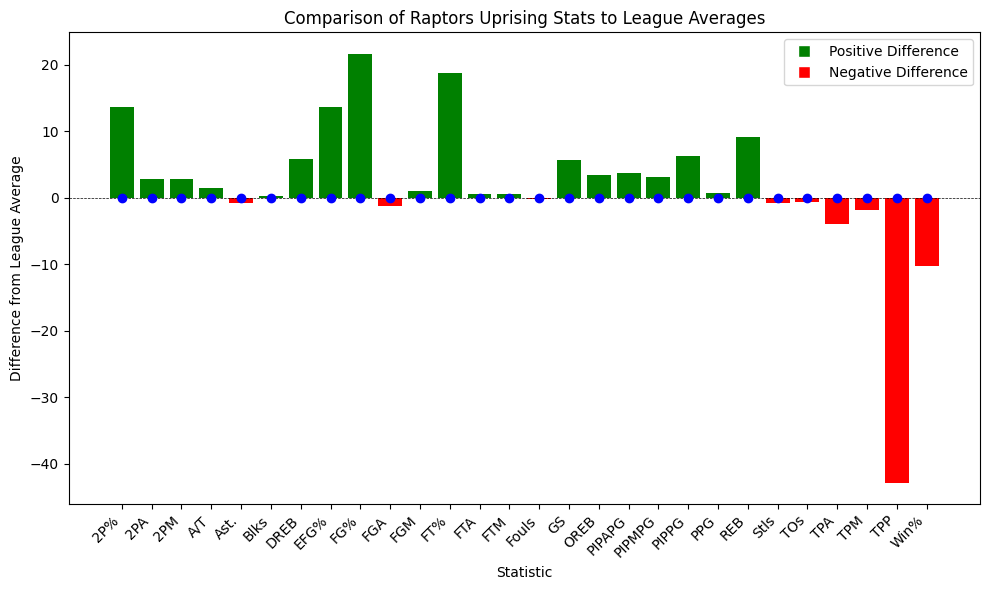

In [10]:
from matplotlib.colors import LinearSegmentedColormap

# Step 2: Extract Raptors Uprising stats
raptors_uprising_stats = all_data[all_data['TeamName'] == 'Raptors Uprising GC'].iloc[0, :][numeric_columns]

# Ensure column names are aligned
numeric_columns = raptors_uprising_stats.index

# Step 3: Calculate differences
stat_differences = raptors_uprising_stats - league_averages

# Create a Series from the provided differences
stat_differences = pd.Series(stat_differences)

# Create color list based on differences
colors = ['green' if diff > 0 else 'red' if diff < 0 else 'grey' for diff in stat_differences]

plt.figure(figsize=(10, 6))
bar = plt.bar(stat_differences.index, stat_differences.values, color=colors)

# Adding league averages as reference lines
plt.axhline(y=0, color='black', linewidth=0.5, linestyle='--', label='League Average')

# Adding Raptors Uprising as a reference point
plt.plot(stat_differences.index, [0] * len(stat_differences), 'o', color='blue', label='Raptors Uprising')

plt.xlabel('Statistic')
plt.ylabel('Difference from League Average')
plt.title('Comparison of Raptors Uprising Stats to League Averages')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Add custom legend for colors
plt.legend(handles=[
                    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='green', markersize=8, label='Positive Difference'),
                    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markersize=8, label='Negative Difference')])

plt.tight_layout()
plt.show()

### Defensive Stats

In [11]:
# Defensive Possessions
all_data['DefensivePossessions'] = 0.96 * (all_data['FGA'] + all_data['TOs'] + 0.44 * all_data['FTA'] - all_data['OREB'])

# Calculate Rebounds per Game (REB/G)
all_data['REB/G'] = all_data['REB'] / all_data['GPFilter comparator>=Select GP0510152025']

# Calculate Steals per Game (STL/G)
all_data['STL/G'] = all_data['Stls'] / all_data['GPFilter comparator>=Select GP0510152025']

# Calculate Blocks per Game (BLK/G)
all_data['BLK/G'] = all_data['Blks'] / all_data['GPFilter comparator>=Select GP0510152025']

# Calculate Defensive Rebound Percentage (DREB%)
all_data['DREB%'] = (all_data['DREB'] / (all_data['DREB'] + all_data['OREB'])) * 100

# Calculate Steal Percentage (STL%)
all_data['STL%'] = (all_data['Stls'] / all_data['DefensivePossessions']) * 100

# Calculate Block Percentage (BLK%)
all_data['BLK%'] = (all_data['Blks'] / all_data['FGA']) * 100

In [12]:
all_data

,Player,GPFilter comparator>=Select GP0510152025,WinsFilter comparator>=Select Wins0510152025,Win%,PPG,DREB,OREB,REB,Ast.,TOs,...,EFG%,GS,TeamName,DefensivePossessions,REB/G,STL/G,BLK/G,DREB%,STL%,BLK%
0,630,29,17.0,58.62,20.03,0.31,0.030,0.34,5.06,2.13,...,86.78,16.44,76ers GC,14.666880,0.011724,0.043793,0.000034,91.176471,8.658965,0.007905
1,Anias,23,14.0,60.86,5.34,2.56,0.560,3.13,1.43,0.60,...,90.74,5.65,GEN.G Tigers,3.418022,0.136087,0.043478,0.022609,82.051282,29.256684,14.772727
2,ANT,21,12.0,57.14,26.14,0.09,0.001,0.09,11.47,2.85,...,81.90,23.52,Pistons GC,21.030720,0.004286,0.067619,0.000048,98.901099,6.752028,0.005631
3,ANTOINE,19,9.0,47.36,17.36,0.21,0.001,0.21,9.78,2.52,...,78.20,16.03,Cavs Legion GC,15.080640,0.011053,0.035789,0.000053,99.526066,4.509092,0.008123
4,antoinelove,23,13.0,56.52,25.17,0.30,0.040,0.34,9.34,2.73,...,89.06,21.88,Hornets Venom GT,19.075200,0.014783,0.035652,0.000043,88.235294,4.298775,0.006135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Vandi,17,6.0,35.29,19.17,0.47,0.110,0.58,6.41,2.05,...,89.25,15.64,DUX Infinitos,14.260224,0.034118,0.017059,0.000059,81.034483,2.033629,0.007949
124,WhatsStick,15,8.0,53.33,9.60,0.86,0.660,1.53,0.86,0.60,...,82.71,7.99,Knicks Gaming,6.842112,0.102000,0.133333,0.026667,56.578947,29.230740,5.610098
125,Witness,12,4.0,33.33,13.41,0.16,0.001,0.16,3.50,1.08,...,83.76,9.84,Wizards District Gaming,10.463424,0.013333,0.055000,0.000083,99.378882,6.307687,0.010256
126,YooVC,19,9.0,47.36,10.63,3.36,1.420,4.78,1.21,0.73,...,86.82,10.55,Warriors Gaming Squad,6.112512,0.251579,0.077368,0.035789,70.292887,24.049033,10.029499


In [13]:
csv_file_path = 'C:/Users/tmanett/Desktop/Uprising/2k_data.csv'
all_data.to_csv(csv_file_path, index=False)


### Calculating WARP
WARP stands for Wins Above Replacement Player. The term and concept are borrowed from sabermetrics and, specifically, Baseball Prospectus. Conceptually, the WARP system seeks to evaluate players in the context of a team made up of them and four completely average players. The performance of this team is then compared to that of a team made up of four average players and one replacement-level player


#### Offense:

Minor and Major Posessions

In [14]:
all_data["Minor_Possessions"] = all_data['FGA'] + 0.44 * all_data['FTA'] + all_data['TOs']
all_data["Major_Possessions"] = all_data['FGA'] + 0.44 * all_data['FTA'] - all_data['OREB'] + all_data['TOs']


TmAst/TmFGM

In [15]:
team_assists = all_data.groupby('TeamName')['Ast.'].sum()
team_made_field_goals = all_data.groupby('TeamName')['FGM'].sum()

# Next, calculate the ratio of assists to made field goals for each team
team_assists_to_made_field_goals = team_assists / team_made_field_goals

# Merge the calculated ratio back into the 'team_stats' DataFrame
all_data = pd.merge(all_data, team_assists_to_made_field_goals.rename('TmAst_TmFGM'), left_on='TeamName', right_index=True)


(Ast/Min) / (TmAst / (TmMin/5))

In [16]:
num_players = 5 
player_min = 24

# Step 1: Calculate individual player's assists per minute (Ast/Min)
all_data['Ast_Per_Min'] = all_data['Ast.'] / player_min

# Step 2: Calculate team's average assists per minute (TmAst/(TmMin/5))
team_avg_ast_per_min = all_data.groupby('TeamName').apply(lambda x: x['Ast.'].sum() / (len(x) * player_min)).reset_index()
team_avg_ast_per_min.columns = ['TeamName', 'Tm_Avg_Ast_Per_Min']

# Step 3: Merge the team's average assists per minute back into the 'all_data' DataFrame
all_data = pd.merge(all_data, team_avg_ast_per_min, on='TeamName', how='left')

# Step 4: Calculate the desired ratio (Ast/Min relative to TmAst/(TmMin/5))
all_data['Ratio_Ast_Per_Min'] = all_data['Ast_Per_Min'] / all_data['Tm_Avg_Ast_Per_Min']

(OReb/Min) * 48

In [17]:
# Step 1: Calculate individual player's offensive rebounds per minute (OReb/Min)
all_data['OReb_Per_Min'] = all_data['OREB'] / player_min

# Step 2: Calculate the number of offensive rebounds per 48 minutes
all_data['Off_Reb_Per_48_Min'] = all_data['OReb_Per_Min'] * 48

(3A/FGA)^2*(1/Usage)^2

In [18]:
# Step 1: Calculate individual player's Usage using 'Major_Possessions'
all_data['Usage'] = all_data['Major_Possessions'] / (player_min / num_players)

# Step 1: Calculate (3A/FGA)^2
all_data['Three_Point_Efficiency'] = (all_data['TPA'] / all_data['FGA']) ** 2

# Step 3: Calculate (1/Usage)^2
all_data['Usage_Efficiency'] = (1 / all_data['Usage']) ** 2

# Step 4: Calculate the final shooting efficiency metric
all_data['Shooting_Efficiency'] = all_data['Three_Point_Efficiency'] * all_data['Usage_Efficiency']

Complete Formula

In [19]:
# Step 8: Calculate the complete formula
all_data['Complete_Formula'] = all_data['TmAst_TmFGM'] * (1.53 - 1.442 * (all_data['Ast_Per_Min'] / all_data['Tm_Avg_Ast_Per_Min']) - 
                                                     0.041 * ((all_data['OREB'] / player_min) * 48) - 
                                                     0.787 * all_data['Usage'] + 
                                                     0.014 * all_data['Shooting_Efficiency'])

offensive rating 

In [20]:
# Drop the row where 'Player' column has the value 'LordBeezus_'
all_data = all_data.drop(all_data[all_data['Player'] == 'LordBeezus_'].index)

In [21]:
# Step 9: Calculate Points Created (PC) using the 'Complete_Formula' column
all_data['PC'] = all_data['Complete_Formula'] * all_data['FGM'] * 0.75

# Step 10: Calculate the estimated assisted field goals (Afgm)
all_data['Afgm'] = all_data['Ast.'] * 0.5

# Step 11: Calculate Possessions (Pos) using the formula provided
all_data['Pos'] = all_data['FGA'] + (0.44 * all_data['FTA']) + all_data['TOs'] + (0.375 * all_data['Ast.']) - all_data['Afgm']

# Step 12: Calculate Offensive Rating
all_data['Offensive_Rating'] = (all_data['PC'] / all_data['Pos']) * 100

In [22]:

#Calc LgOffRatMinor
total_minor_possessions = all_data['Pos'].sum()

# Step 2: Calculate the total number of points scored on minor possessions for the entire league
total_points_minor_possessions = all_data['PC'].sum()

# Step 3: Calculate the league average offensive rating on minor possessions
league_avg_offensive_rating_minor = (total_points_minor_possessions / total_minor_possessions) * 100


# Step 2: Calculate TmOffRatMinor
all_data['TmOffRatMinor'] = all_data['Offensive_Rating'] * all_data['Usage'] + ((1 - all_data['Usage']) * (league_avg_offensive_rating_minor+ (25 * (all_data['Usage'] - 0.2))))

# Calculate Oreb%
all_data['Oreb%'] = (all_data['OREB'] / all_data['REB']) * 100

# Calulate LgOReb%
league_average_offensive_rebound_percentage = (all_data['OREB'].sum() / all_data['REB'].sum()) * 100

# Calculate TmOReb%
all_data['TmOReb%'] = all_data['Oreb%'] + (4 * league_average_offensive_rebound_percentage / (5 - league_average_offensive_rebound_percentage)) * (1 - all_data['Oreb%'])

# Calculate PlayerRebOpp%
all_data['PlayerRebOpp%'] = ((all_data['FGA'] - all_data['FGM']) + (0.56 * (all_data['FTA'] - all_data['FTM']))) / (all_data['FGA'] + (0.44 * all_data['FTA']) + all_data['TOs'])

Teammate Stats

In [23]:
# Convert 'Pos' column to percentage (divide by 100)
all_data['Pos%'] = all_data['Pos'] / 100

# TeammateOffRat
all_data['TeammateOffRat'] = league_avg_offensive_rating_minor + (0.25 * (all_data['Pos%'] - 0.2))

# TeammateFGA%
all_data['TeammateFGA%'] = (1 - ((all_data['TOs'].sum())/(all_data['Minor_Possessions'].sum()) * (1 + (0.5*(0.2-all_data['Usage'])))) - (all_data['FTA'].sum() / all_data['Minor_Possessions'].sum()))

#Teammate eFG%
all_data['Teammate_eFG%'] = ((all_data['TeammateOffRat']/100) - (all_data['FTM'].sum()/all_data['Minor_Possessions'].sum())) / all_data['TeammateFGA%']

# Calculate regular field goal %
league_field_goal_percentage = (all_data['FGM'].sum() / all_data['FGA'].sum()) * 100

# Calculate league's effective field goal percentage (Lg eFG%)
league_effective_field_goal_percentage = ((all_data['FGM'].sum() + 0.5 * all_data['TPM'].sum()) / all_data['FGA'].sum()) * 100

# Calculate TeammateFG%
all_data['TeammateFG%'] = all_data['Teammate_eFG%'] / (league_effective_field_goal_percentage / league_field_goal_percentage)

# Calc. TRO%
all_data['TeammateRebOpp%'] = (1 - all_data['Teammate_eFG%']) *  all_data['TeammateFGA%'] + 0.56 * ((all_data['FTA'].sum() - all_data['FTM'].sum()) / total_minor_possessions)

# TMRebOpp%
all_data['TmRebOpp%'] = all_data['PlayerRebOpp%'] * all_data['Usage'] + all_data['TeammateRebOpp%'] * (1 - all_data['Usage'])


Rebound Adjustments

In [24]:
RebFactor1 = all_data['REB'].sum() / ((all_data['FGA'].sum() - all_data['FGM'].sum()) + 0.56 * (all_data['FTA'].sum() - all_data['FTM'].sum()))

Team Offensive Rating

In [25]:
all_data['TmOffRat'] = all_data['TmOffRatMinor'] + (all_data['TmOReb%'] * all_data['TmRebOpp%'] * RebFactor1 * all_data['TmOffRatMinor'])

In [26]:
all_data

,Player,GPFilter comparator>=Select GP0510152025,WinsFilter comparator>=Select Wins0510152025,Win%,PPG,DREB,OREB,REB,Ast.,TOs,...,TmOReb%,PlayerRebOpp%,Pos%,TeammateOffRat,TeammateFGA%,Teammate_eFG%,TeammateFG%,TeammateRebOpp%,TmRebOpp%,TmOffRat
0,630,29,17.0,58.62,20.03,0.31,0.030,0.34,5.06,2.13,...,46.095343,0.311994,0.146755,-54.517548,0.987225,-0.623138,-0.528567,1.605457,-2.511528,31131.732052
1,DJ,30,18.0,60.00,14.40,6.76,3.630,10.40,3.13,1.36,...,196.424021,0.156212,0.096771,-54.530044,0.870194,-0.707086,-0.599775,1.488551,-0.298560,2047.524276
2,Dre,30,18.0,60.00,18.20,0.50,0.030,0.53,8.66,2.30,...,27.862725,0.365951,0.136255,-54.520173,0.979281,-0.628219,-0.532877,1.597539,-2.168556,18038.476618
3,DT,30,18.0,60.00,8.06,3.63,0.560,4.20,1.86,0.76,...,72.090153,0.461326,0.065887,-54.537765,0.867848,-0.709086,-0.601472,1.486282,0.149313,19.417335
4,UnderRatedGoat,30,18.0,60.00,9.56,0.60,0.500,1.10,1.10,0.36,...,257.238953,0.286729,0.062797,-54.538538,0.863294,-0.712836,-0.604652,1.481736,0.008592,35.474244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Matty,15,8.0,53.33,9.26,0.73,0.800,1.53,1.40,0.46,...,296.625028,0.375618,0.068662,-54.537072,0.867584,-0.709295,-0.601648,1.486010,0.042222,63.659037
124,May,16,8.0,50.00,5.81,4.06,0.750,4.81,2.06,0.37,...,85.112229,0.236594,0.035617,-54.545333,0.825588,-0.745474,-0.632337,1.444098,0.672000,-574.664726
125,Scoreo,16,8.0,50.00,11.87,5.75,1.870,7.62,2.62,1.75,...,136.690057,0.115931,0.083225,-54.533431,0.874717,-0.703469,-0.596707,1.493107,-0.452155,1429.291917
126,Simptoms,14,7.0,50.00,15.71,0.28,0.001,0.28,2.00,0.64,...,-2.705471,0.363123,0.106532,-54.527604,0.929292,-0.662093,-0.561610,1.547624,-1.142724,-239.689301


Save to Excel (Eventually send to GS)

Correlation Heat Map

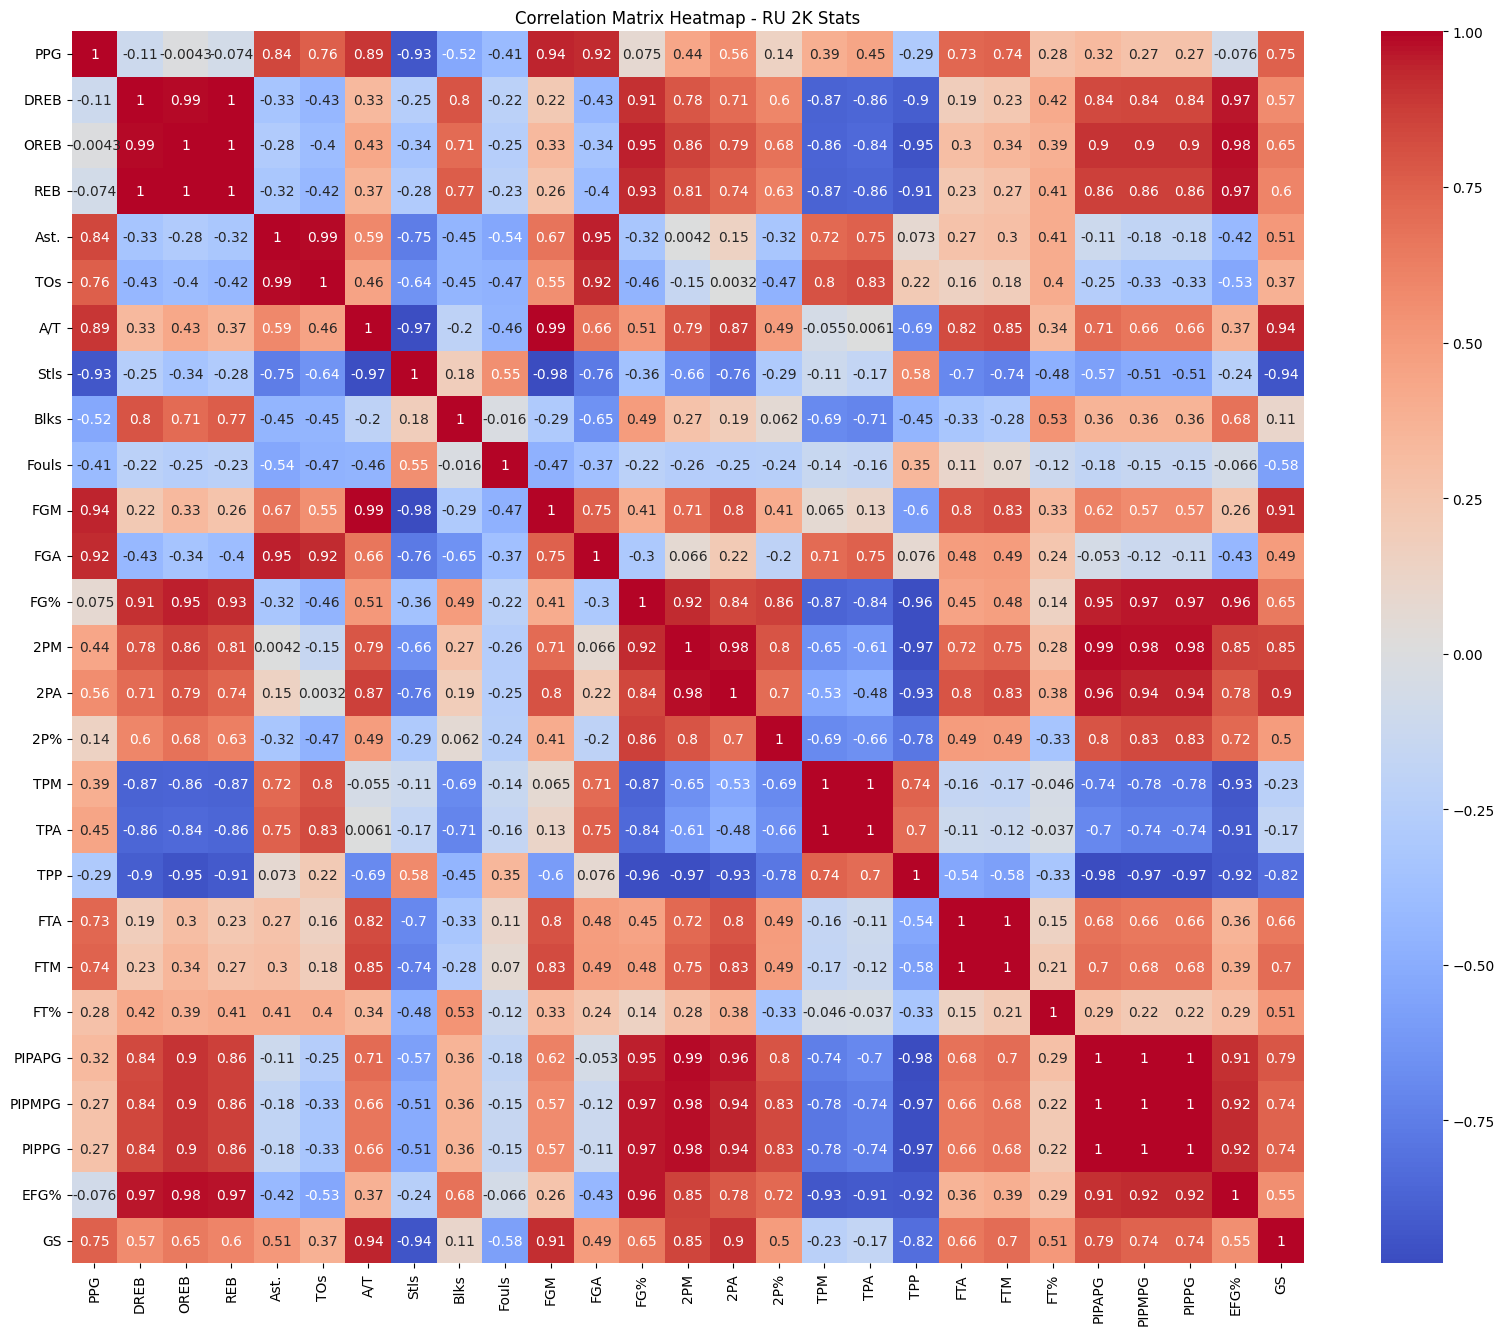

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to exclude
columns_to_exclude = ['Player']

# Create a new data frame with only the selected columns
selected_stats_df = table_data.drop(columns=columns_to_exclude)

# Calculate the correlation matrix
correlation_matrix = selected_stats_df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap - RU 2K Stats')
plt.show()

##### From the correlation matrix, we can gain several insights:

1. Positive Correlations
- Points per game (PPG) has a strong positive correlation with field goals made (FGM), three-pointers made (TPM), free throws made (FTM), and assists (Ast.). This suggests that when we score more points, we tend to have higher field goal, three-pointer, and free throw percentages, as well as more assists.
- Assists (Ast.) have a moderate positive correlation with field goals made (FGM) and three-pointers made (TPM). This implies that when we have more assists, we tend to have higher field goal and three-pointer percentages.

2. Negative Correlations:
- Turnovers (TOs) have a moderate negative correlation with assists (Ast.) and field goal percentage (FG%). This indicates that when we have fewer turnovers, we tend to have more assists and a higher field goal percentage.
- Personal fouls (Fouls) have a strong negative correlation with winning percentage (Win%). This suggests that when we have fewer personal fouls, we tend to have a higher chance of winning.

3. Strong Relationships:
- Points per game (PPG) has a strong positive correlation with field goals attempted (FGA), indicating that we score more points when we take more shots.
- Field goal percentage (FG%) has a strong positive correlation with two-point field goals made (2PM), two-point field goals attempted (2PA), and effective field goal percentage (EFG%). This suggests that when we have a higher field goal percentage, we also have a higher percentage of two-point field goals made, two-point field goals attempted, and effective field goal percentage.

4. Weak Relationships:
- Defensive rebounds (DREB) and offensive rebounds (OREB) have a weak positive correlation with winning percentage (Win%). This implies that rebounding alone does not strongly predict a team's success.

### Player Efficiency Rating

#### How the formula works
- Multiply each component by a specific weight and sum them together.
- The weights used in the formula are 3 for field goals made (FGM) and 0.5 for free throws made (FTM).
- Subtract twice the difference between field goals attempted (FGA) and field goals made (FGM).
- Subtract 0.44 times the difference between free throws attempted (FTA) and free throws made (FTM).
- Add rebounds (REB), assists-to-turnovers (AST_TO), and steals-blocks-fouls (STL_BLK_PF).
- Divide the result by the player's minutes played (MP) to normalize the PER value.


In [28]:
# Assuming the DataFrame `all_data` has the required columns
# MP: Minutes Played
# FGM: Field Goals Made
# FGA: Field Goals Attempted
# FTM: Free Throws Made
# FTA: Free Throws Attempted
# OREB: Offensive Rebounds
# DREB: Defensive Rebounds
# Ast: Assists
# Stl: Steals
# Blk: Blocks
# TO: Turnovers
# PF: Fouls

# Define a function to calculate PER for a single player
def calculate_PER(row):
    MP = 24
    FGM = row['FGM']
    FGA = row['FGA']
    FTM = row['FTM']
    FTA = row['FTA']
    OREB = row['OREB']
    DREB = row['DREB']
    Ast = row['Ast.']
    Stl = row['Stls']
    Blk = row['Blks']
    TO = row['TOs']
    PF = row['Fouls']

    # Calculate the different components of the PER formula
    REB = OREB + DREB
    AST_TO = Ast - TO
    STL_BLK_PF = Stl + Blk + PF

    # Apply the PER formula
    per = (1 / MP) * (3 * (FGM + 0.5 * FTM) - 2 * (FGA - FGM) - 0.44 * (FTA - FTM) + REB + AST_TO + STL_BLK_PF)

    return per

# Apply the PER calculation to the DataFrame
all_data['PER'] = all_data.apply(calculate_PER, axis=1)

# Sort the DataFrame by PER in descending order and get the top 10 players
top_10_players_PER = all_data[['Player', 'PER', 'FGM', 'FGA', 'FTM', 'FTA', 'REB']].sort_values('PER', ascending=False).head(10)
top_10_players_PER

,Player,PER,FGM,FGA,FTM,FTA,REB
25,BallLikeSeem,1.432917,6.07,7.50,1.28,1.28,12.50
1,DJ,1.394908,6.83,8.33,0.73,0.86,10.40
7,FEAST,1.360725,6.47,7.91,0.43,0.47,11.43
53,Type,1.320300,5.94,7.11,0.70,0.82,11.23
86,Dimez,1.314517,5.50,6.57,1.14,1.28,10.28
95,Sick One,1.291283,6.27,8.09,0.86,1.04,12.04
127,unguardable,1.261325,9.87,16.00,1.50,1.68,0.37
63,Nay,1.250983,5.62,7.56,0.56,0.62,12.31
22,Crown,1.238333,5.82,7.13,0.60,0.60,9.73
10,ANT,1.223042,9.76,17.76,2.85,2.95,0.09


PER for Uprising

In [29]:
# Apply the PER calculation to the DataFrame
table_data['PER'] = table_data.apply(calculate_PER, axis=1)
# Sort the DataFrame by PER in descending order and get the top 10 players
top_10_players_PER_RU = table_data[['Player', 'PER', 'FGM', 'FGA', 'FTM', 'FTA', 'REB']].sort_values('PER', ascending=False).head(10)
top_10_players_PER_RU


,Player,PER,FGM,FGA,FTM,FTA,REB
0,BallLikeSeem,1.432917,6.07,7.50,1.28,1.28,12.50
3,Mooch,0.622500,6.00,12.64,0.78,0.78,0.21
1,Gazulli,0.606075,5.15,9.76,1.38,1.46,0.23
4,Putback,0.481875,2.71,5.35,0.07,0.07,4.00
2,Haam,0.433533,3.76,6.76,0.38,0.46,0.92


### Offensive Efficiency

In basketball statistics, Offensive Efficiency Rating (OER) is the average number of points scored by a basketball player per shot taken. This includes missed field goals as well as free throws. The statistic stems from the previously created Player Efficiency Rating (PER).

In [30]:
def calculate_OE(row):

    MP = 24
    FGA = row['FGA']
    FTA = row['FTA']
    TO = row['TOs']
    PPG = row['PPG']

    # Calculate the total posessions:
    total_posessions = FGA + 0.44 * FTA + TO

    # The addition of 0.44 in the calculation of total possessions is an estimation used to account for the fact that not all missed field goals result in a change of possession. 
    # It is a common approximation used in basketball analytics to adjust for offensive rebounds.

    # Calculate points scored per posession:
    ps_per_possesion = PPG / total_posessions

    # Calculate Offensive Efficiency 

    return ps_per_possesion

# Apply the OE calculation to the DataFrame
all_data['OE'] = all_data.apply(calculate_OE, axis=1)
# Sort the DataFrame by PER in descending order and get the top 10 players
top_10_players_OE = all_data[['Player', 'OE', 'PER', 'FGA', 'FTA', 'PPG', 'TOs']].sort_values('OE', ascending=False).head(10)
top_10_players_OE

   

,Player,OE,PER,FGA,FTA,PPG,TOs
61,Kenny Got Work,1.662324,0.991250,8.31,0.500,15.31,0.68
46,DTrick,1.566260,0.664375,4.35,0.210,8.07,0.71
23,Plu,1.565404,0.499414,4.92,0.150,8.76,0.61
43,JaySnags,1.564544,0.689646,3.80,0.001,6.65,0.45
36,Clampism,1.549687,0.513225,5.73,0.170,9.60,0.39
25,BallLikeSeem,1.541962,1.432917,7.50,1.280,13.42,0.64
124,May,1.521261,0.672650,3.37,0.180,5.81,0.37
38,Slaughter,1.516344,1.137725,6.21,0.560,11.17,0.91
4,UnderRatedGoat,1.489746,0.606458,6.00,0.130,9.56,0.36
53,Type,1.466064,1.320300,7.11,0.820,12.58,1.11


OE for Uprising

In [31]:
# Apply the OE calculation to the DataFrame
table_data['OE'] = table_data.apply(calculate_OE, axis=1)
# Sort the DataFrame by PER in descending order and get the top 10 players
top_10_players_OE_RU = table_data[['Player', 'OE', 'PER', 'FGA', 'FTA', 'PPG', 'TOs']].sort_values('OE', ascending=False).head(10)
top_10_players_OE_RU


,Player,OE,PER,FGA,FTA,PPG,TOs
0,BallLikeSeem,1.541962,1.432917,7.50,1.28,13.42,0.64
2,Haam,1.325717,0.433533,6.76,0.46,9.84,0.46
1,Gazulli,1.211869,0.606075,9.76,1.46,14.00,1.15
4,Putback,1.185889,0.481875,5.35,0.07,7.14,0.64
3,Mooch,1.055871,0.622500,12.64,0.78,16.57,2.71
